In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
hr_df = pd.read_csv("hr_data.csv")

In [7]:
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [8]:
hr_df.shape

(14999, 9)

In [9]:
hr_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [12]:
hr_df['department'].unique() #to find how many unique values are there in department attribute

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
#Loading employees satisfaction csv

In [16]:
em_df = pd.read_excel("employee_satisfaction_evaluation.xlsx")

In [17]:
em_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [18]:
em_df.shape

(14999, 3)

In [19]:
#Merge the two files hr_df and em_df

In [20]:
df = hr_df.set_index('employee_id').join(em_df.set_index('EMPLOYEE #')) #Joining files based on the same emp id

In [21]:
df = df.reset_index()

In [22]:
df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [23]:
df.shape

(14999, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [25]:
df.isnull()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [27]:
df[df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [28]:
df.describe

<bound method NDFrame.describe of        employee_id  number_project  average_montly_hours  time_spend_company  \
0             1003               2                   157                   3   
1             1005               5                   262                   6   
2             1486               7                   272                   4   
3             1038               5                   223                   5   
4             1057               2                   159                   3   
...            ...             ...                   ...                 ...   
14994        87670               2                   151                   3   
14995        87673               2                   160                   3   
14996        87679               2                   143                   3   
14997        87681               6                   280                   4   
14998        87684               2                   158                   3   

     

In [29]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.fillna(df.mean(), inplace= True)

In [31]:
df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [33]:
df.loc[df['employee_id']== 3794] #Filled gaps with the mean values

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [35]:
df.drop(columns='employee_id',inplace= True)

In [36]:
df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [38]:
df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [41]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [42]:
df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [43]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [44]:
#visualisation 

No handles with labels found to put in legend.


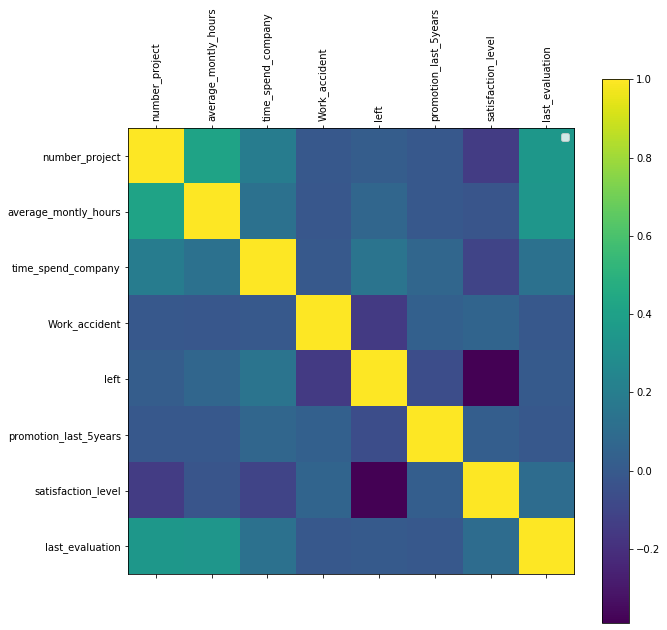

In [50]:
def plot_corr(ddf, size = 10):
    corr = ddf.corr()
    fig, ax = plt.subplots(figsize= (size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

In [51]:
#Satisfaction is the main reason to leave the company

<BarContainer object of 14999 artists>

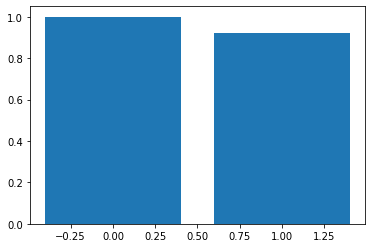

In [52]:
plt.bar(x= df['left'],height= df['satisfaction_level'])

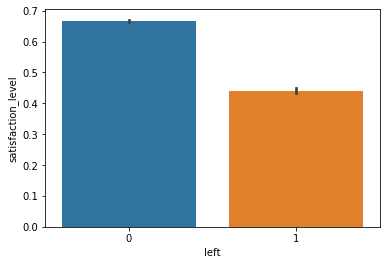

In [53]:
sns.barplot(x= 'left',y= 'satisfaction_level', data= df )

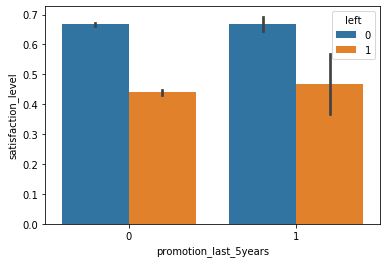

In [55]:
sns.barplot(x= 'promotion_last_5years', y='satisfaction_level', data= df, hue= 'left')

In [56]:
#On an average 61% did not get promotion

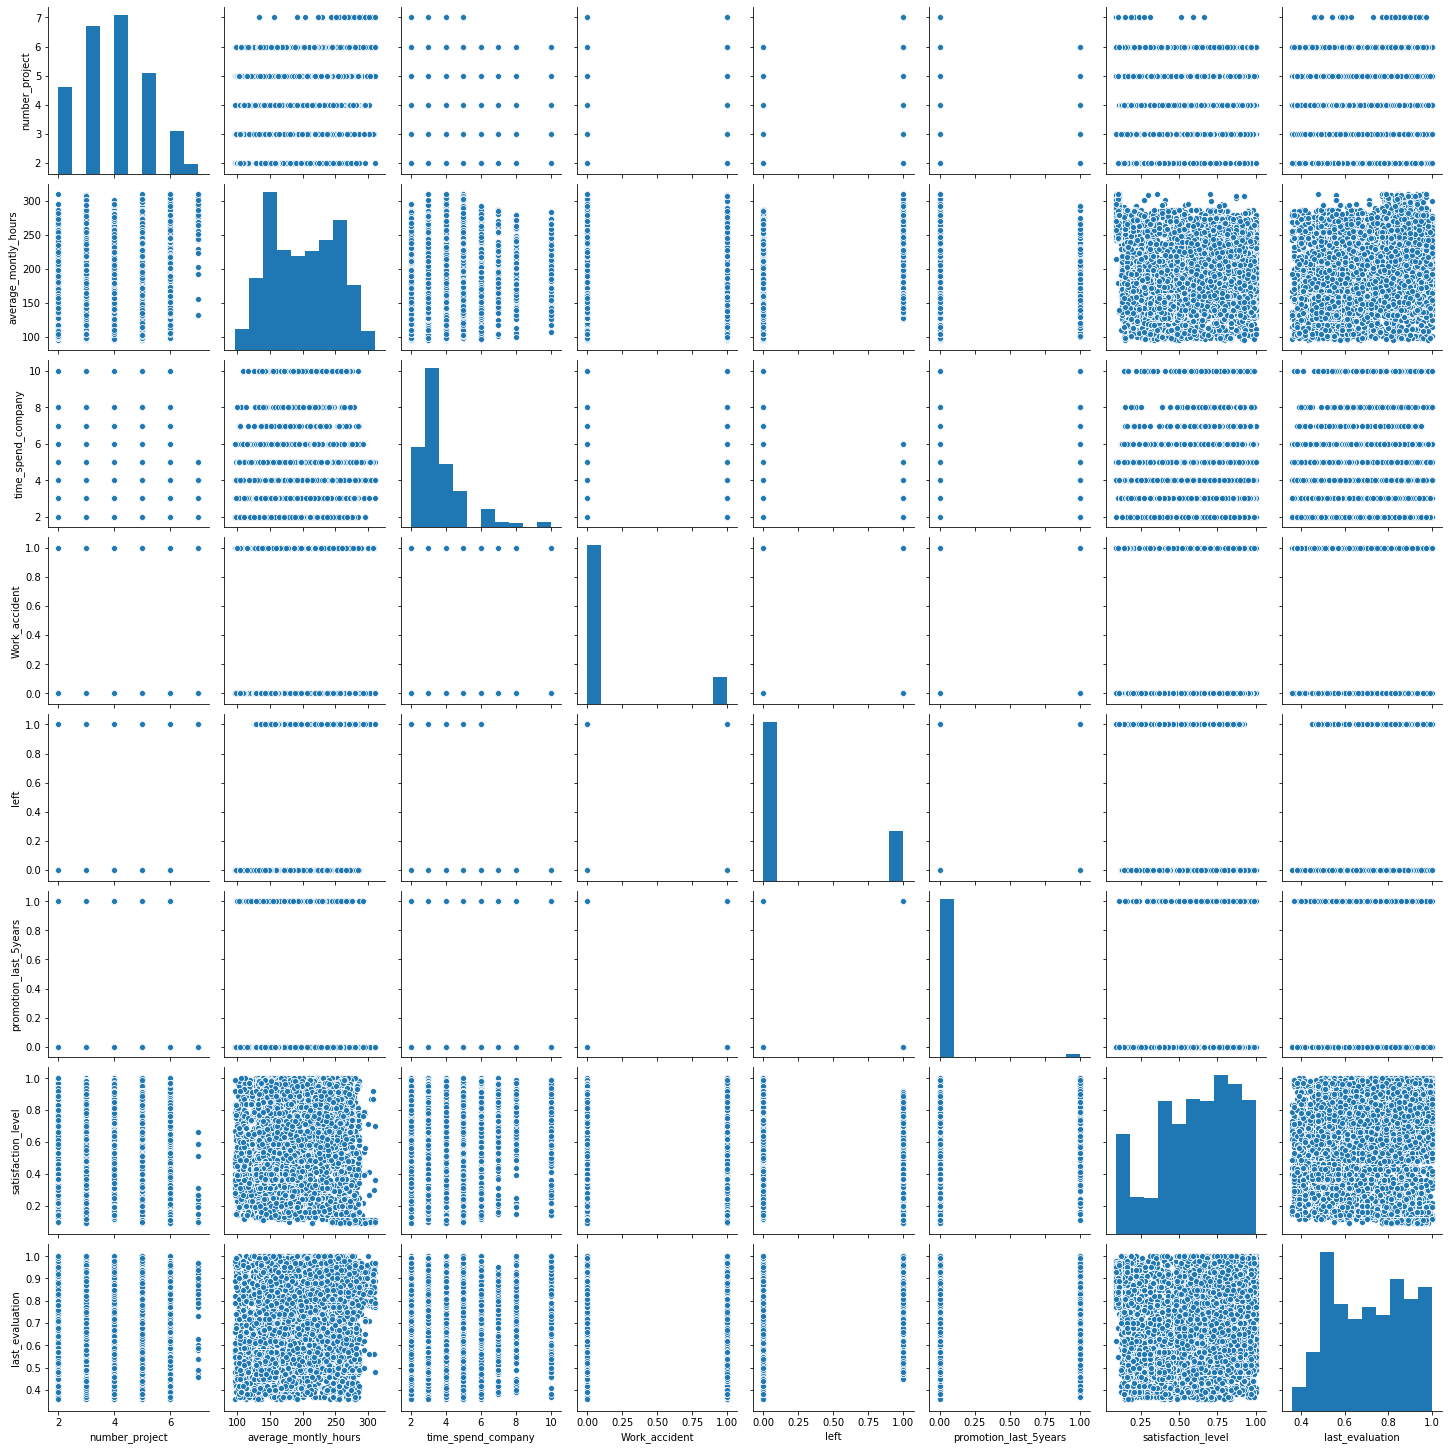

In [57]:
sns.pairplot(df)

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


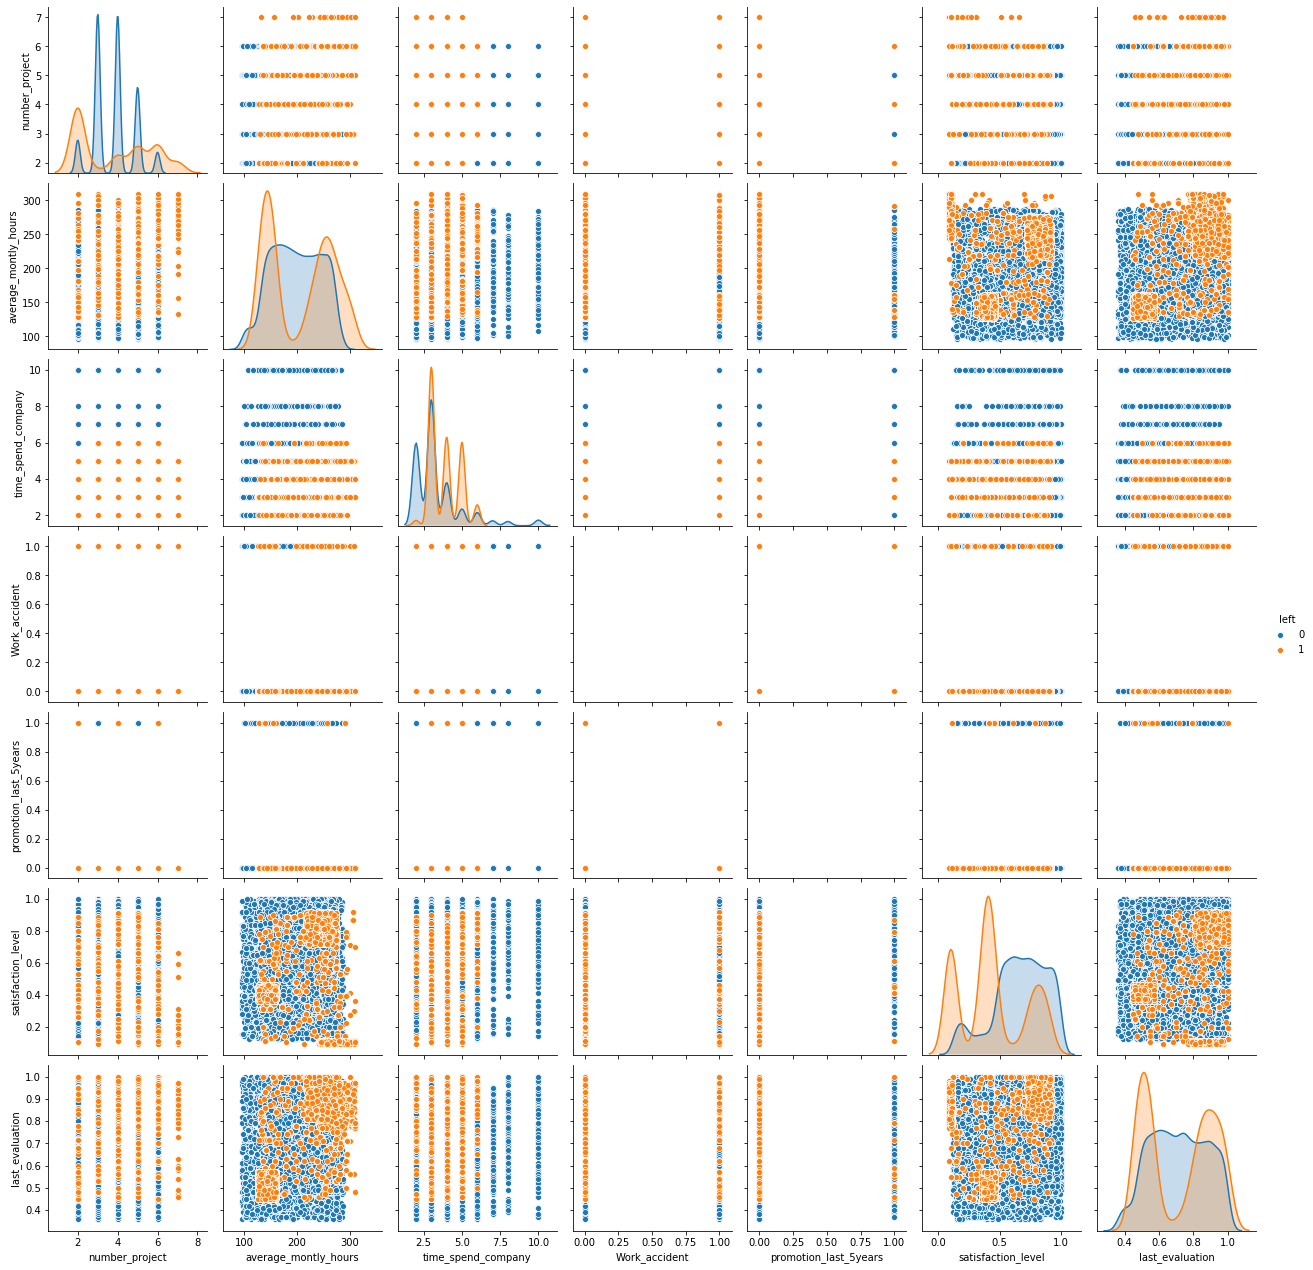

In [58]:
sns.pairplot(df, hue= 'left')

# Data preprocessing

In [60]:
y = df[['department','salary']]

In [61]:
y

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a = le.fit_transform(df['salary']) #Label encoding

In [63]:
a

array([1, 2, 2, ..., 1, 1, 1])

In [65]:
df['salary_updated'] = a

In [66]:
df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_updated
0,2,157,3,0,1,0,sales,low,0.38,0.53,1
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2
3,5,223,5,0,1,0,sales,low,0.72,0.87,1
4,2,159,3,0,1,0,sales,low,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57,1
14995,2,160,3,0,1,0,support,low,0.37,0.48,1
14996,2,143,3,0,1,0,support,low,0.37,0.53,1
14997,6,280,4,0,1,0,support,low,0.11,0.96,1


In [67]:
df.loc[df['salary'] == 'high']

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_updated
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [68]:
df.drop(['salary'], axis= 1, inplace= True)

In [69]:
b = le.fit_transform(df['department'])

In [70]:
b

array([7, 7, 7, ..., 8, 8, 8])

In [81]:
df['department_updated'] = b

In [ ]:
df.drop(['department', axis= 1, inplace= True])

In [77]:
df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_updated,department_updated
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


In [84]:
x = df.drop(['left'], axis= 1) #independent variable

In [85]:
x

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_updated,department_updated
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,0.40,0.57,1,8
14995,2,160,3,0,0,0.37,0.48,1,8
14996,2,143,3,0,0,0.37,0.53,1,8
14997,6,280,4,0,0,0.11,0.96,1,8


In [86]:
y = df['left']

In [87]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [88]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [89]:
y.shape

(14999,)

## Splitting the model

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.7, test_size= 0.3)

In [92]:
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_updated,department_updated
12602,7,250,4,0,0,0.10,0.84,1,6
4889,4,154,3,1,0,0.57,0.68,2,4
1572,2,154,3,0,0,0.39,0.48,1,9
13375,4,132,4,0,0,0.91,0.68,2,0
879,5,263,5,0,0,0.82,0.97,2,9
...,...,...,...,...,...,...,...,...,...
5191,4,246,3,0,0,0.52,0.96,1,8
13418,4,233,7,0,0,0.49,0.65,2,7
5390,5,249,2,0,0,0.66,0.73,2,8
860,4,218,5,0,0,0.79,1.00,1,7


# Decision Tree classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [94]:
dt.fit(x_train, y_train) #train 70%of data x with respect to its label y

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
predict_dt = dt.predict(x_test)
predict_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test, predict_dt)

0.9735555555555555

In [101]:
custom_dt = [[10,500,10,6,4,0.90,0.89,0,8]]

In [102]:
dt.predict(custom_dt)

array([0], dtype=int64)

In [103]:
#important factor to decide why emp is leaving using desicion tree

In [104]:
dt.feature_importances_

array([9.97394389e-02, 8.62448161e-02, 1.38670609e-01, 1.35234312e-03,
       1.74696565e-05, 4.98802385e-01, 1.57272755e-01, 5.87213529e-03,
       1.20280480e-02])

In [106]:
featue_importance = pd.DataFrame(dt.feature_importances_, index=x_train.columns, columns=['Importance']).sort_values('Importance',ascending= True)
featue_importance

,Importance
promotion_last_5years,0.000017
Work_accident,0.001352
salary_updated,0.005872
department_updated,0.012028
average_montly_hours,0.086245
number_project,0.099739
time_spend_company,0.138671
last_evaluation,0.157273
satisfaction_level,0.498802


# KNN 

## Data preprocessing

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train) #standard deviation of x_train and to predict on test data by normalizing the magnitude of the values of the data 

In [108]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [109]:
x_train_std

array([[ 2.58705966,  0.98376185,  0.34062496, ...,  0.72165642,
        -0.55860579,  0.0460485 ],
       [ 0.15975498, -0.94073157, -0.34355745, ..., -0.21302401,
         1.03856256, -0.65360887],
       [-1.45844814, -0.94073157, -0.34355745, ..., -1.38137455,
        -0.55860579,  1.09553456],
       ...,
       [ 0.96885654,  0.96371504, -1.02773985, ...,  0.07906362,
         1.03856256,  0.74570588],
       [ 0.15975498,  0.34226404,  1.02480736, ...,  1.65633686,
        -0.55860579,  0.39587719],
       [-1.45844814,  0.36231085,  0.34062496, ...,  0.83849148,
        -0.55860579,  0.39587719]])

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)

In [111]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [113]:
prediction_knn = knn.predict(x_test_std)
prediction_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
accuracy_score(y_test, prediction_knn)

0.9551111111111111

In [120]:
irange = range(1,20)
score = {}
score_list = []

In [121]:
for i in irange:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train_std,y_train)
    prediction_knn = knn.predict(x_test_std)
    score[i] = accuracy_score(y_test, prediction_knn)
    score_list.append(accuracy_score(y_test, prediction_knn))

In [122]:
score

{1: 0.966,
 2: 0.9617777777777777,
 3: 0.9551111111111111,
 4: 0.9526666666666667,
 5: 0.9515555555555556,
 6: 0.9531111111111111,
 7: 0.9493333333333334,
 8: 0.9515555555555556,
 9: 0.9488888888888889,
 10: 0.9491111111111111,
 11: 0.9468888888888889,
 12: 0.9471111111111111,
 13: 0.9446666666666667,
 14: 0.946,
 15: 0.9448888888888889,
 16: 0.946,
 17: 0.9435555555555556,
 18: 0.9435555555555556,
 19: 0.9422222222222222}

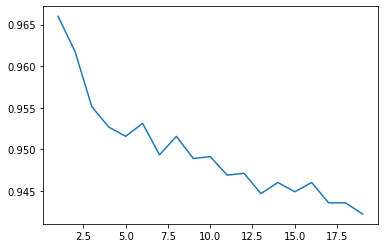

In [123]:
plt.plot(irange,score_list)